## CAPSTONE PROJECT 

In the below sample data, we are using a machine learning model to predict if a world record was achieved for Men's 400m track based on the data from previous years.

## Step 1: Import Libraries

In [1]:
 #Import our dependencies
import psycopg2 as pg
import pandas.io.sql as psql

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas.io.sql as psql

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from imblearn.ensemble import BalancedRandomForestClassifier
import tensorflow as tf
import pandas as pd
import numpy as np

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Step 2: Load the Data

In [16]:
# Using sample data to test machine learning model
file_path = '../Resources/Sample Data for ML/Athletics - 400m Men Finals (1992-2021)-Athletics - 400m Men Finals (1992-2021).csv'
df = pd.read_csv(file_path, index_col=0)
df

,games,name,country,continent,rank,time,reaction,dry,wet,or_yes,or_no,wr_yes,wr_no
0,1992,Quincy Watts,USA,NORTH AMERICA,1,43.50,0.258,1,0,1,0,1,0
1,1992,Steve Lewis,USA,NORTH AMERICA,2,44.21,0.219,1,0,0,1,0,1
2,1992,Samson Kitur,KEN,AFRICA,3,44.24,0.269,1,0,0,1,0,1
3,1992,Ian Morris,TTO,SOUTH AMERICA,4,44.25,0.241,1,0,0,1,0,1
4,1992,Roberto Hernandez Prendes,CUB,AMERICA,5,44.52,0.372,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,2021,Michael Cherry,USA,NORTH AMERICA,4,44.21,0.179,1,0,0,1,0,1
58,2021,Michael Norman,USA,NORTH AMERICA,5,44.31,0.148,1,0,0,1,0,1
59,2021,Christopher Taylor,JAM,NORTH AMERICA,6,44.79,0.158,1,0,0,1,0,1
60,2021,Isaac Makwala,BOT,AFRICA,7,44.94,0.167,1,0,0,1,0,1


In [18]:
# Loading Data from PGAdmin
#connection = pg.connect("host=localhost dbname=kinder user=your_username password=your_password")
#dataframe = psql.read_sql('SELECT * FROM product_product', connection)
#product_category = psql.read_sql_query('select * from product_category', connection)

## Step 3: Look at Shape and Summary of Data

In [17]:
# Review Shape
df.shape

(62, 13)

In [18]:
# look for number of unique values in each column.
df.nunique()

games         8
name         54
country      25
continent     7
rank          8
time         52
reaction     56
dry           2
wet           2
or_yes        2
or_no         2
wr_yes        2
wr_no         2
dtype: int64

## Step 4: Create Visualizations (Plots, etc.) to Explore the Data

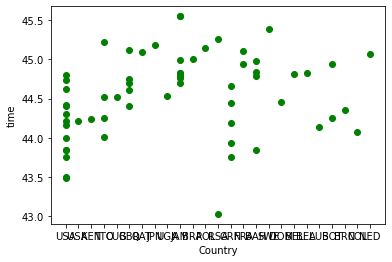

In [19]:
# Create a plot to look at relationship

plt.scatter(df.country, df.time, c='green')
plt.xlabel('Country')
plt.ylabel('time')
plt.show()

## Step 5: Pre-Process Data (Remove unnecessary columns from dataset)

In [20]:
df = df.drop(['name'],axis=1)
df

,games,country,continent,rank,time,reaction,dry,wet,or_yes,or_no,wr_yes,wr_no
0,1992,USA,NORTH AMERICA,1,43.50,0.258,1,0,1,0,1,0
1,1992,USA,NORTH AMERICA,2,44.21,0.219,1,0,0,1,0,1
2,1992,KEN,AFRICA,3,44.24,0.269,1,0,0,1,0,1
3,1992,TTO,SOUTH AMERICA,4,44.25,0.241,1,0,0,1,0,1
4,1992,CUB,AMERICA,5,44.52,0.372,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
57,2021,USA,NORTH AMERICA,4,44.21,0.179,1,0,0,1,0,1
58,2021,USA,NORTH AMERICA,5,44.31,0.148,1,0,0,1,0,1
59,2021,JAM,NORTH AMERICA,6,44.79,0.158,1,0,0,1,0,1
60,2021,BOT,AFRICA,7,44.94,0.167,1,0,0,1,0,1


## Step 6: Encode Object Data

In [9]:
# Generate our categorical variable lists
#categorical = df.dtypes[df.dtypes == "object"].index.tolist()

# Create a OneHotEncoder instance
#enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
#encode_df = pd.DataFrame(enc.fit_transform(df[categorical]))

# Add the encoded variable names to the dataframe
#encode_df.columns = enc.get_feature_names(categorical)
#encode_df.head()

# Merge one-hot encoded features and drop the originals
#df = df.merge(encode_df,left_index=True, right_index=True)
#df = df.drop(categorical,1)
#df.head()

### Generating Categorical variable lists

In [23]:
# Generate our categorical variable lists
df_cat = ["country", "continent"]

In [24]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(df[df_cat]))
# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(df_cat)
encode_df


,country_AUS,country_BAH,country_BEL,country_BEL,country_BOT,country_BRA,country_BRN,country_COL,country_CUB,country_DOM,...,country_UGA,country_USA,country_USA,continent_AFRICA,continent_AMERICA,continent_ASIA,continent_EUROPE,continent_NORTH AMERICA,continent_OCEANIA,continent_SOUTH AMERICA
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
58,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
59,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
60,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
# Merge one-hot encoded features and drop the originals
df = df.merge(encode_df, left_index=True, right_index=True).drop(columns=df_cat, axis=1)
df

,games,rank,time,reaction,dry,wet,or_yes,or_no,wr_yes,wr_no,...,country_UGA,country_USA,country_USA,continent_AFRICA,continent_AMERICA,continent_ASIA,continent_EUROPE,continent_NORTH AMERICA,continent_OCEANIA,continent_SOUTH AMERICA
0,1992,1,43.50,0.258,1,0,1,0,1,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1992,2,44.21,0.219,1,0,0,1,0,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1992,3,44.24,0.269,1,0,0,1,0,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1992,4,44.25,0.241,1,0,0,1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1992,5,44.52,0.372,1,0,0,1,0,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,2021,4,44.21,0.179,1,0,0,1,0,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
58,2021,5,44.31,0.148,1,0,0,1,0,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
59,2021,6,44.79,0.158,1,0,0,1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
60,2021,7,44.94,0.167,1,0,0,1,0,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
# Create features
X = df.drop(columns='rank')
# Create targets
y = df['rank']

In [27]:
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify = y)

## Step 9: Scale the Data

In [28]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Step 10: Build the Models

## Supervised ML - BalancedRandomForestClassifier

In [29]:
# Resample the training data with the BalancedRandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
forest = BalancedRandomForestClassifier(n_estimators = 100, random_state=1)
forest = forest.fit(X_train, y_train)

In [30]:
# Calculate the balanced accuracy score
from sklearn.metrics import balanced_accuracy_score

predictions = forest.predict(X_test)
balanced_accuracy_score(y_test, predictions)

0.125

In [31]:
# Display the confusion matrix
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, predictions)
print(matrix)

[[1 0 0 1 0 0 0 0]
 [0 0 1 1 0 0 0 0]
 [0 1 0 0 0 0 1 0]
 [0 1 0 0 0 0 1 0]
 [0 0 0 1 0 1 0 0]
 [0 0 0 0 1 0 0 1]
 [0 0 0 0 1 0 1 0]
 [0 0 0 0 0 1 1 0]]


In [32]:
# Print the imbalanced classification report
from imblearn.metrics import classification_report_imbalanced
report = classification_report_imbalanced(y_test, predictions)
print(report)

                   pre       rec       spe        f1       geo       iba       sup

          1       1.00      0.50      1.00      0.67      0.71      0.48         2
          2       0.00      0.00      0.86      0.00      0.00      0.00         2
          3       0.00      0.00      0.93      0.00      0.00      0.00         2
          4       0.00      0.00      0.79      0.00      0.00      0.00         2
          5       0.00      0.00      0.86      0.00      0.00      0.00         2
          6       0.00      0.00      0.86      0.00      0.00      0.00         2
          7       0.25      0.50      0.79      0.33      0.63      0.38         2
          8       0.00      0.00      0.93      0.00      0.00      0.00         2

avg / total       0.16      0.12      0.88      0.12      0.17      0.11        16



In [33]:
# List the features sorted in descending order by feature importance
#feature = X.columns
#sorted(zip(forest.feature_importances_, feature), reverse=True)

## Unsupervised ML - NeuralNetwork

In [34]:
nn_model = tf.keras.models.Sequential()
nn_model.add(tf.keras.layers.Dense(units=16, activation="relu", input_dim=8))
nn_model.add(tf.keras.layers.Dense(units=16, activation="relu"))
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [35]:
# Compile the model
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
# Train the model
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=50)

In [ ]:
# Evaluate the model using the test data
#model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
#print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")